In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/Users/ayushparoha/Documents/Data_Science/env/college/ass4/creditcard.csv")
df.isnull().sum()
df.shape

(284807, 31)

In [ ]:
cm=df.corr()
cc=cm["Class"].abs().sort_values(ascending=False)

print("Absolute correlation with 'class' in decending:\n ",cc)

Absolute correlation with 'class' in decending:
  Class     1.000000
V17       0.326481
V14       0.302544
V12       0.260593
V10       0.216883
V16       0.196539
V3        0.192961
V7        0.187257
V11       0.154876
V4        0.133447
V18       0.111485
V1        0.101347
V9        0.097733
V5        0.094974
V2        0.091289
V6        0.043643
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
Time      0.012323
V28       0.009536
V24       0.007221
Amount    0.005632
V13       0.004570
V26       0.004455
V15       0.004223
V25       0.003308
V23       0.002685
V22       0.000805
Name: Class, dtype: float64


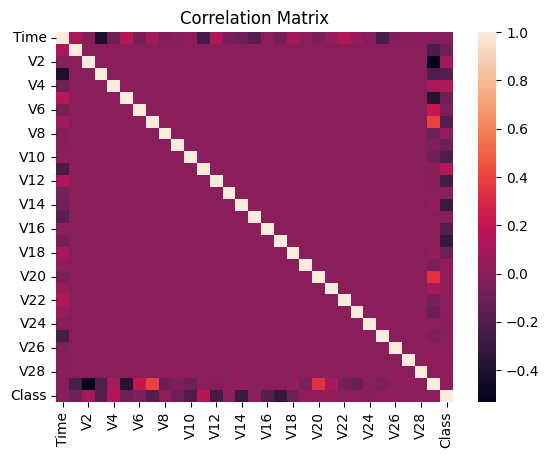

In [ ]:
sns.heatmap(cm)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#for finding top 5 correlated features 
tcf=cc.head(6).index.tolist() #the index will in the form of list(like a row)
if 'Class' in tcf:
    tcf.remove('Class')

In [ ]:
#top 5 features =t5f
t5f=tcf[:5]
print(t5f)

['V17', 'V14', 'V12', 'V10', 'V16']


In [ ]:
print("\n------------- IQR Outlier Detection for Top 5 Features -------------")

for feature in t5f:
    
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    
    IQR = q3 - q1
    
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    
    # Total outliers
    to = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    
    # Fraudulent outliers among total outliers
    fo = to[to["Class"] == 1]
    
    print(f"\nFeature: {feature}")
    print(f"Q1: {q1:.2f}")
    print(f"Q3: {q3:.2f}")
    print(f"IQR: {IQR:.2f}")
    print(f"Lower Bound: {lower_bound:.2f}")
    print(f"Upper Bound: {upper_bound:.2f}")
    print(f"Total Outliers: {len(to)}")
    print(f"Fraudulent Outliers (Class 1): {len(fo)}")


------------- IQR Outlier Detection for Top 5 Features -------------

Feature: V17
Q1: -0.48
Q3: 0.40
IQR: 0.88
Lower Bound: -1.81
Upper Bound: 1.72
Total Outliers: 7420
Fraudulent Outliers (Class 1): 397

Feature: V14
Q1: -0.43
Q3: 0.49
IQR: 0.92
Lower Bound: -1.80
Upper Bound: 1.87
Total Outliers: 14149
Fraudulent Outliers (Class 1): 430

Feature: V12
Q1: -0.41
Q3: 0.62
IQR: 1.02
Lower Bound: -1.94
Upper Bound: 2.15
Total Outliers: 15348
Fraudulent Outliers (Class 1): 409

Feature: V10
Q1: -0.54
Q3: 0.45
IQR: 0.99
Lower Bound: -2.02
Upper Bound: 1.94
Total Outliers: 9496
Fraudulent Outliers (Class 1): 399

Feature: V16
Q1: -0.47
Q3: 0.52
IQR: 0.99
Lower Bound: -1.96
Upper Bound: 2.01
Total Outliers: 8184
Fraudulent Outliers (Class 1): 351


In [ ]:
# Z-score Outlier Detection
print("\n---------- Z-Score Outlier Detection ----------")

z = 3   # threshold

for feature in t5f:
    
    mean = df[feature].mean()
    std = df[feature].std()

    # Calculate Z-score
    df[f"{feature}_zscore"] = (df[feature] - mean) / std

    # Identify total outliers
    toz = df[df[f"{feature}_zscore"].abs() > z]

    # Identify fraudulent outliers
    foz = toz[toz["Class"] == 1]

    print(f"\nFeature: {feature}")
    print(f"Mean: {mean:.2f}")
    print(f"Standard Deviation: {std:.2f}")
    print(f"Z-score Threshold: {z}")
    print(f"Total Outliers: {len(toz)}")
    print(f"Fraudulent Outliers (Class 1): {len(foz)}")


---------- Z-Score Outlier Detection ----------

Feature: V17
Mean: -0.00
Standard Deviation: 0.85
Z-score Threshold: 3
Total Outliers: 2515
Fraudulent Outliers (Class 1): 369

Feature: V14
Mean: 0.00
Standard Deviation: 0.96
Z-score Threshold: 3
Total Outliers: 3380
Fraudulent Outliers (Class 1): 411

Feature: V12
Mean: -0.00
Standard Deviation: 1.00
Z-score Threshold: 3
Total Outliers: 3393
Fraudulent Outliers (Class 1): 369

Feature: V10
Mean: 0.00
Standard Deviation: 1.09
Z-score Threshold: 3
Total Outliers: 3488
Fraudulent Outliers (Class 1): 326

Feature: V16
Mean: 0.00
Standard Deviation: 0.88
Z-score Threshold: 3
Total Outliers: 2077
Fraudulent Outliers (Class 1): 292


In [ ]:
df.drop(columns=[f"{feature}_zscore"], inplace=True)

In [ ]:
print("\n---------- Z-Score Outlier Detection ----------")

z = 3   # threshold

for feature in t5f:
    
    mean = df[feature].mean()
    std = df[feature].std()

    # Calculate Z-score
    df[f"{feature}_zscore"] = (df[feature] - mean) / std

    # Identify total outliers
    toz = df[df[f"{feature}_zscore"].abs() > z]

    # Identify fraudulent outliers
    foz = toz[toz["Class"] == 1]

    print(f"\nFeature: {feature}")
    print(f"Mean: {mean:.2f}")
    print(f"Standard Deviation: {std:.2f}")
    print(f"Z-score Threshold: {z}")
    print(f"Total Outliers: {len(toz)}")
    print(f"Fraudulent Outliers (Class 1): {len(foz)}")


---------- Z-Score Outlier Detection ----------

Feature: V17
Mean: -0.00
Standard Deviation: 0.85
Z-score Threshold: 3
Total Outliers: 2515
Fraudulent Outliers (Class 1): 369

Feature: V14
Mean: 0.00
Standard Deviation: 0.96
Z-score Threshold: 3
Total Outliers: 3380
Fraudulent Outliers (Class 1): 411

Feature: V12
Mean: -0.00
Standard Deviation: 1.00
Z-score Threshold: 3
Total Outliers: 3393
Fraudulent Outliers (Class 1): 369

Feature: V10
Mean: 0.00
Standard Deviation: 1.09
Z-score Threshold: 3
Total Outliers: 3488
Fraudulent Outliers (Class 1): 326

Feature: V16
Mean: 0.00
Standard Deviation: 0.88
Z-score Threshold: 3
Total Outliers: 2077
Fraudulent Outliers (Class 1): 292


In [ ]:
df.isnull().sum()

Time          0
V1            0
V2            0
V3            0
V4            0
V5            0
V6            0
V7            0
V8            0
V9            0
V10           0
V11           0
V12           0
V13           0
V14           0
V15           0
V16           0
V17           0
V18           0
V19           0
V20           0
V21           0
V22           0
V23           0
V24           0
V25           0
V26           0
V27           0
V28           0
Amount        0
Class         0
V17_zscore    0
V14_zscore    0
V12_zscore    0
V10_zscore    0
V16_zscore    0
dtype: int64

In [ ]:
# Z-score Outlier Detection
print("\n---------- Z-Score Outlier Detection ----------")

#z-scores threshold
z = 3   # threshold

for feature in t5f:
    
    mean = df[feature].mean()
    std = df[feature].std()

    # Calculate Z-score
    df[f"{feature}_zscore"] = (df[feature] - mean) / std

    # Identify total outliers
    toz = df[df[f"{feature}_zscore"].abs() > z]

    # Identify fraudulent outliers
    foz = toz[toz["Class"] == 1]

    print(f"\nFeature: {feature}")
    print(f"Mean: {mean:.2f}")
    print(f"Standard Deviation: {std:.2f}")
    print(f"Z-score Threshold: {z}")
    print(f"Total Outliers: {len(toz)}")
    print(f"Fraudulent Outliers (Class 1): {len(foz)}")

    # Remove temporary z-score column
    df.drop(columns=[f"{feature}_zscore"], inplace=True)


---------- Z-Score Outlier Detection ----------

Feature: V17
Mean: -0.00
Standard Deviation: 0.85
Z-score Threshold: 3
Total Outliers: 2515
Fraudulent Outliers (Class 1): 369

Feature: V14
Mean: 0.00
Standard Deviation: 0.96
Z-score Threshold: 3
Total Outliers: 3380
Fraudulent Outliers (Class 1): 411

Feature: V12
Mean: -0.00
Standard Deviation: 1.00
Z-score Threshold: 3
Total Outliers: 3393
Fraudulent Outliers (Class 1): 369

Feature: V10
Mean: 0.00
Standard Deviation: 1.09
Z-score Threshold: 3
Total Outliers: 3488
Fraudulent Outliers (Class 1): 326

Feature: V16
Mean: 0.00
Standard Deviation: 0.88
Z-score Threshold: 3
Total Outliers: 2077
Fraudulent Outliers (Class 1): 292


In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

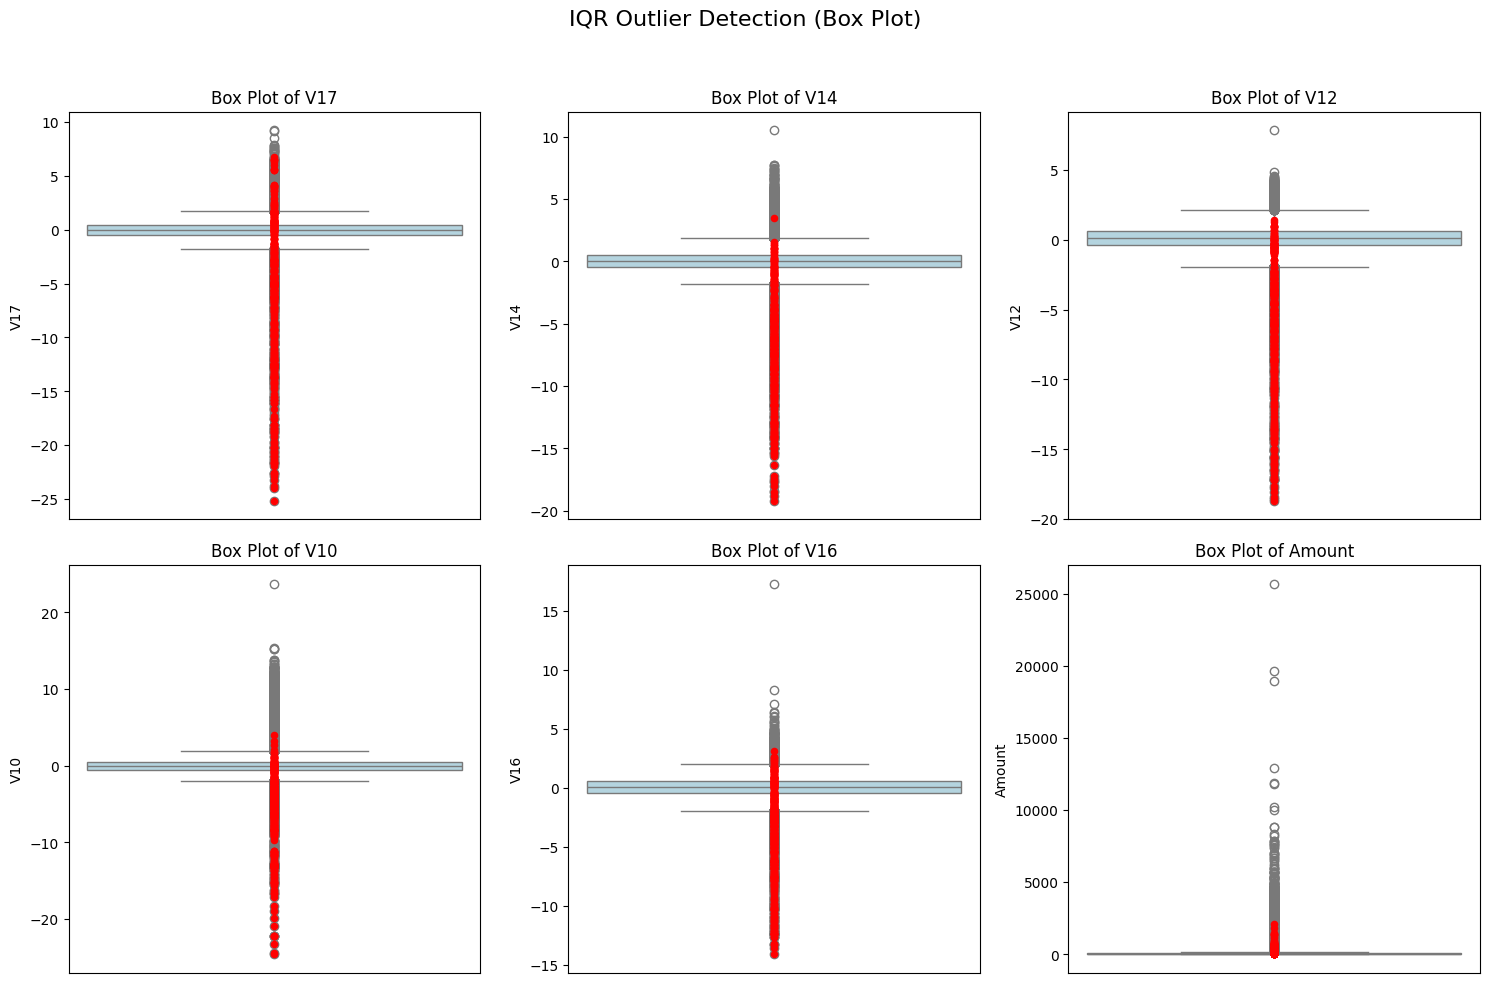

In [ ]:
# Combine top 5 features + "Amount" for IQR visualization
feature_for_iqr_plot = t5f + ['Amount']

plt.figure(figsize=(15, 10))
plt.suptitle("IQR Outlier Detection (Box Plot)", fontsize=16)

for i, feature in enumerate(feature_for_iqr_plot):
    plt.subplot(2, 3, i + 1)

    sns.boxplot(y=df[feature], color="lightblue")

    # Overlay fraudulent transactions
    fraudulent_values = df[df['Class'] == 1][feature]

    plt.scatter(
        x=np.zeros(len(fraudulent_values)),
        y=fraudulent_values,
        color='red',
        s=20,
        zorder=5
    )

    plt.title(f"Box Plot of {feature}")
    plt.ylabel(feature)
    plt.xticks([])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

<ipython-input-19-62d5d7350b78>:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
<ipython-input-19-62d5d7350b78>:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
<ipython-input-19-62d5d7350b78>:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
<ipython-input-19-62d5d7350b78>:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
<ipython-input-19-62d5d7350b78>:26: UserWarning: No artists with labels found to put in legend.  Note that artists w

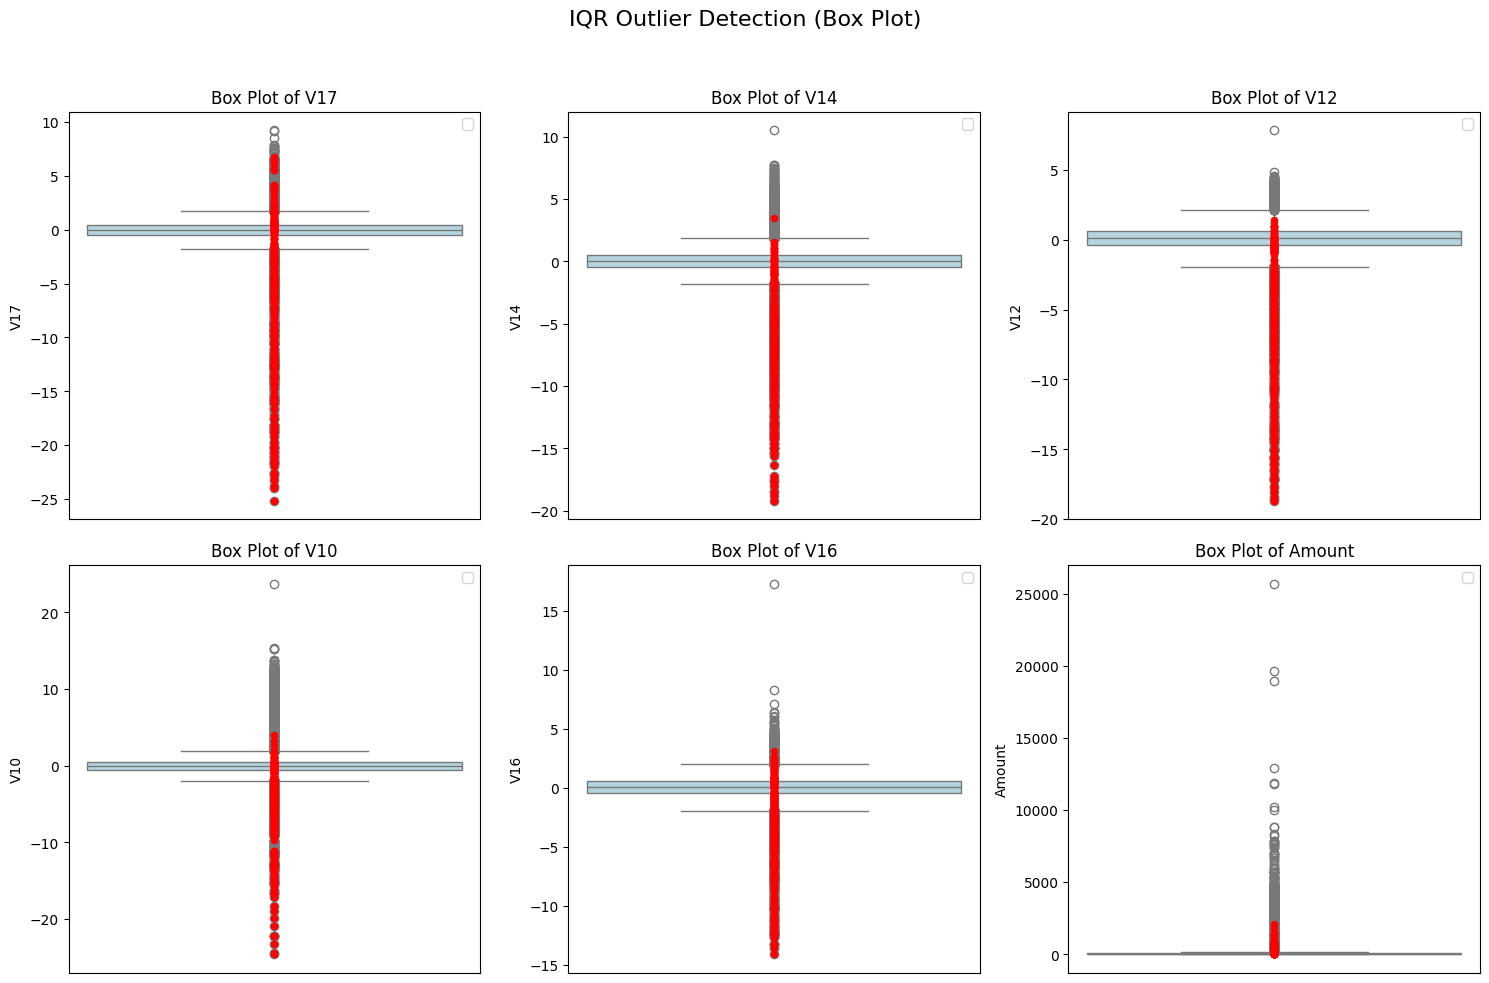

In [ ]:
# Combine top 5 features + "Amount" for IQR visualization
feature_for_iqr_plot = t5f + ['Amount']

plt.figure(figsize=(15, 10))
plt.suptitle("IQR Outlier Detection (Box Plot)", fontsize=16)

for i, feature in enumerate(feature_for_iqr_plot):
    plt.subplot(2, 3, i + 1)

    sns.boxplot(y=df[feature], color="lightblue")

    # Overlay fraudulent transactions
    fraudulent_values = df[df['Class'] == 1][feature]

    plt.scatter(
        x=np.zeros(len(fraudulent_values)),
        y=fraudulent_values,
        color='red',
        s=20,
        zorder=5
    )

    plt.title(f"Box Plot of {feature}")
    plt.ylabel(feature)
    plt.xticks([])
    plt.legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

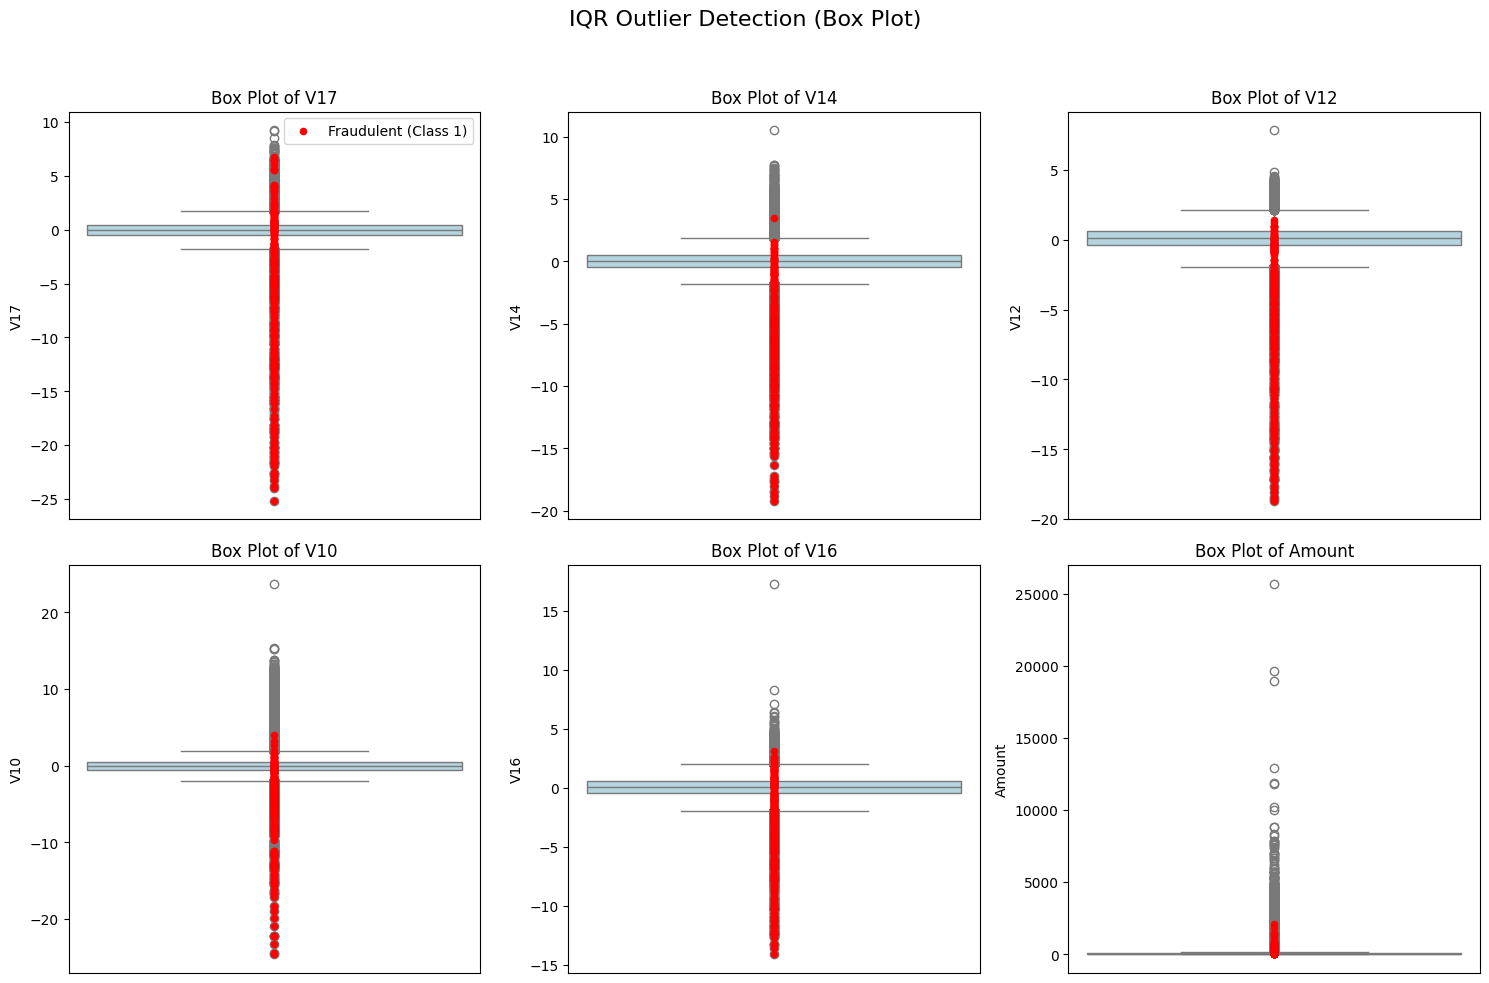

In [ ]:
# Combine top 5 features + "Amount" for IQR visualization
feature_for_iqr_plot = t5f + ['Amount']

plt.figure(figsize=(15, 10))
plt.suptitle("IQR Outlier Detection (Box Plot)", fontsize=16)

#enumereate ->> execute values one-by-one
for i, feature in enumerate(feature_for_iqr_plot):
    plt.subplot(2, 3, i + 1)

    sns.boxplot(y=df[feature], color="lightblue")

    # Overlay fraudulent transactions
    fraudulent_values = df[df['Class'] == 1][feature]

    #zorder->>> giving a ordering sequence top priority and 1 as least priority
    plt.scatter(x=np.zeros(len(fraudulent_values)),y=fraudulent_values,color='red',s=20, label="Fraudulent (Class 1)" if i == 0 else "",zorder=5)

    plt.title(f"Box Plot of {feature}")
    plt.ylabel(feature)
    
    #hide the x-ticks of x axis
    plt.xticks([])
    
    if i == 0:
        plt.legend()

#tight_layout for proper spacing between graphs
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

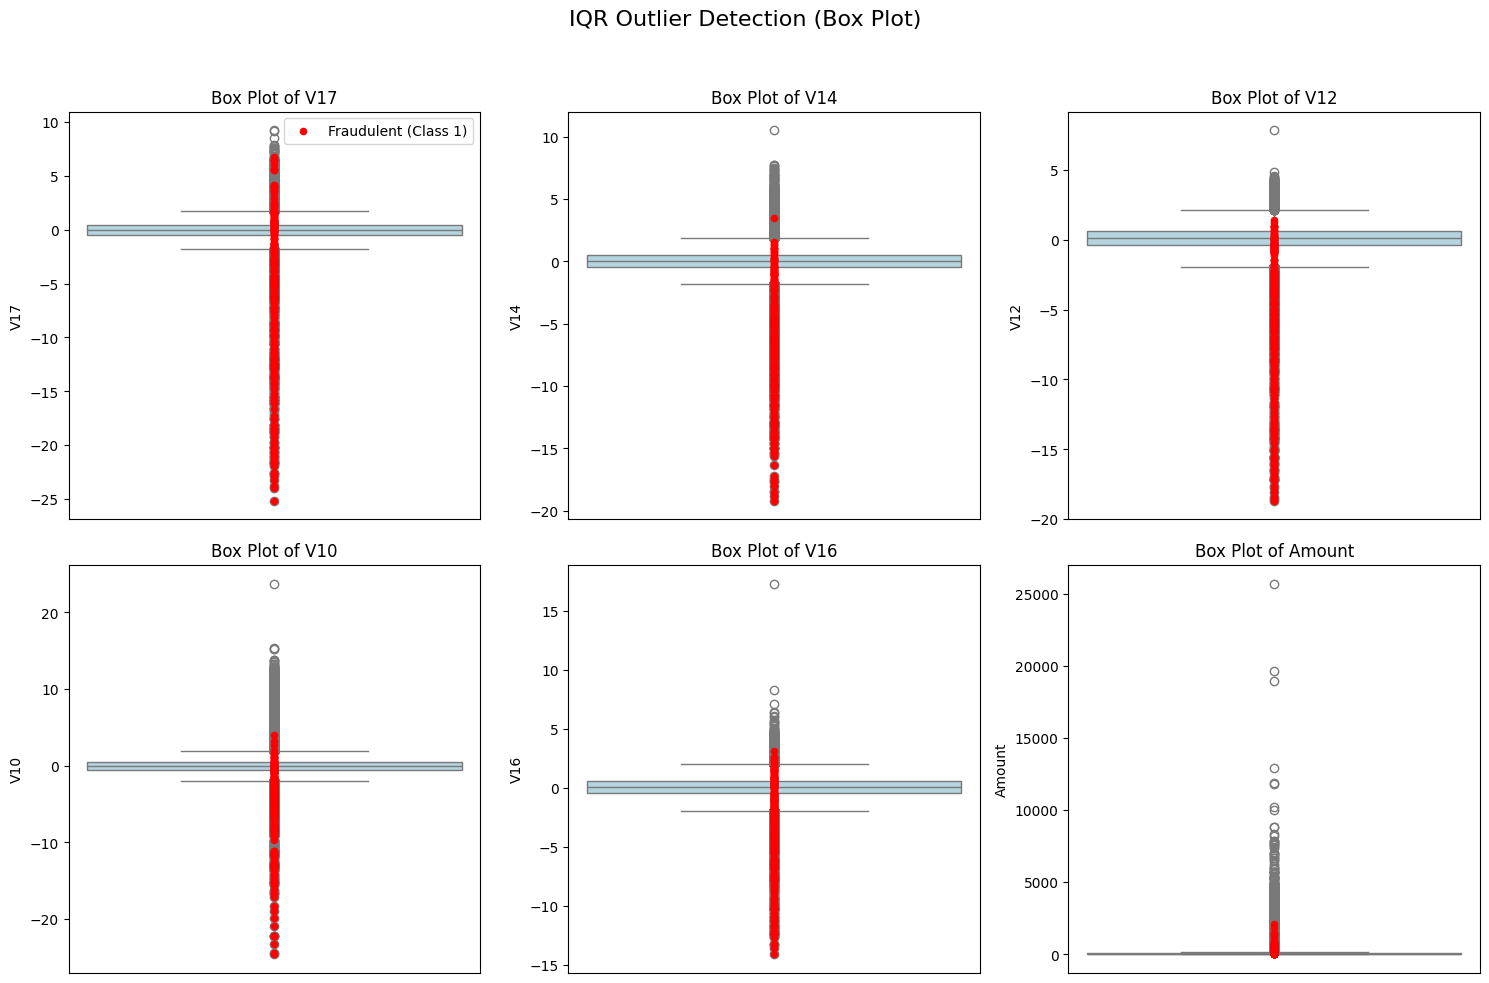

In [ ]:
feature_for_iqr_plot = t5f + ['Amount']

plt.figure(figsize=(15, 10))
plt.suptitle("IQR Outlier Detection (Box Plot)", fontsize=16)

rows = 2
cols = 3

for i, feature in enumerate(feature_for_iqr_plot):
    plt.subplot(rows, cols, i + 1)

    sns.boxplot(y=df[feature], color="lightblue")

    # Overlay fraudulent transactions
    fraudulent_values = df[df['Class'] == 1][feature]

    plt.scatter(
        x=np.zeros(len(fraudulent_values)),
        y=fraudulent_values,
        color='red',
        s=20,
        label="Fraudulent (Class 1)" if i == 0 else "",
        zorder=5
    )

    plt.title(f"Box Plot of {feature}")
    plt.ylabel(feature)
    plt.xticks([])

    if i == 0:
        plt.legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()